In [1]:
library(anndata)
library(CellChat)
library(patchwork)
options(stringsAsFactors = FALSE)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2



In [2]:
create_OutputFolder <- function(folder_path) {
  if (!file.exists(folder_path)) {
    dir.create(folder_path, recursive = TRUE)
    cat("Folder created:", folder_path, "\n")
  } else {
    cat("Folder already exists:", folder_path, "\n")
  }
}

objects_folder="./output/dataobjects"
create_OutputFolder(objects_folder)

Folder already exists: ./output/dataobjects 


In [3]:
CNTRL=readRDS(file=paste0(objects_folder,"/cellchat_Cntrl_adjusted_XY_PROCESSED_withDE.rds"))
groupSize <- as.numeric(table(CNTRL@idents))

In [4]:
cGN=readRDS(file=paste0(objects_folder,"/cellchat_cGN_adjusted_XY_PROCESSED_withDE.rds"))
groupSize <- as.numeric(table(cGN@idents))

In [5]:
SLE=readRDS(file=paste0(objects_folder,"/cellchat_Sle_adjusted_XY_PROCESSED_withDE.rds"))
groupSize <- as.numeric(table(SLE@idents))

In [6]:
ANCA=readRDS(file=paste0(objects_folder,"/cellchat_Anca_adjusted_XY_PROCESSED_withDE.rds"))
groupSize <- as.numeric(table(ANCA@idents))

In [7]:
GBM=readRDS(file=paste0(objects_folder,"/cellchat_Gbm_adjusted_XY_PROCESSED_withDE.rds"))
groupSize <- as.numeric(table(GBM@idents))

In [8]:
CNTRL_count = CNTRL@net$count
CNTRL_weight = CNTRL@net$weight

cGN_count = cGN@net$count
cGN_weight = cGN@net$weight

SLE_count = SLE@net$count
SLE_weight = SLE@net$weight

ANCA_count = ANCA@net$count
ANCA_weight = ANCA@net$weight

GBM_count = GBM@net$count
GBM_weight = GBM@net$weight

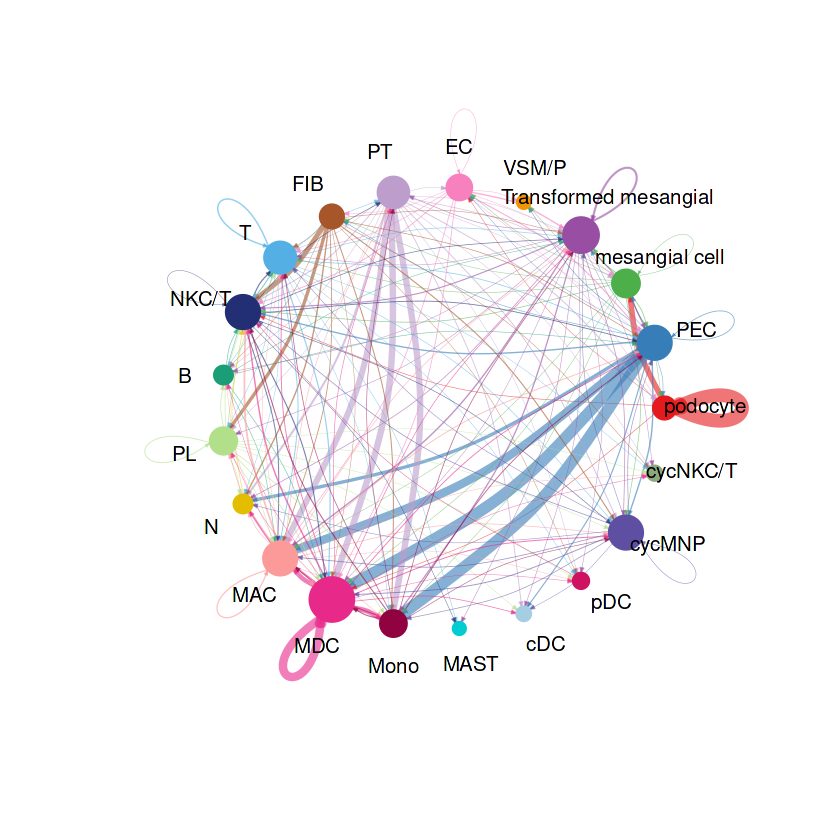

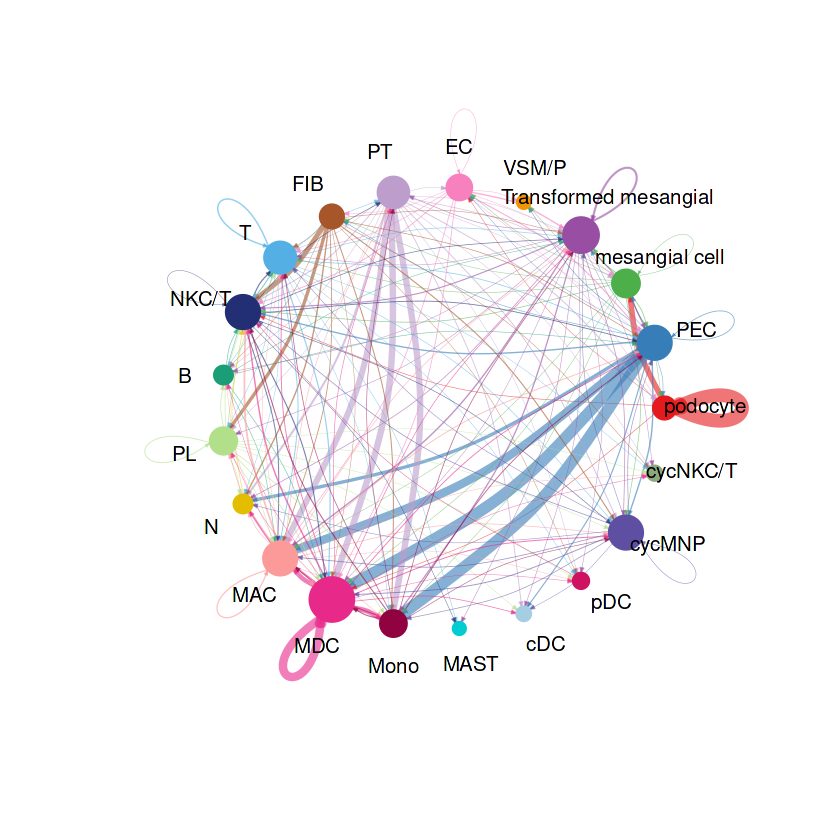

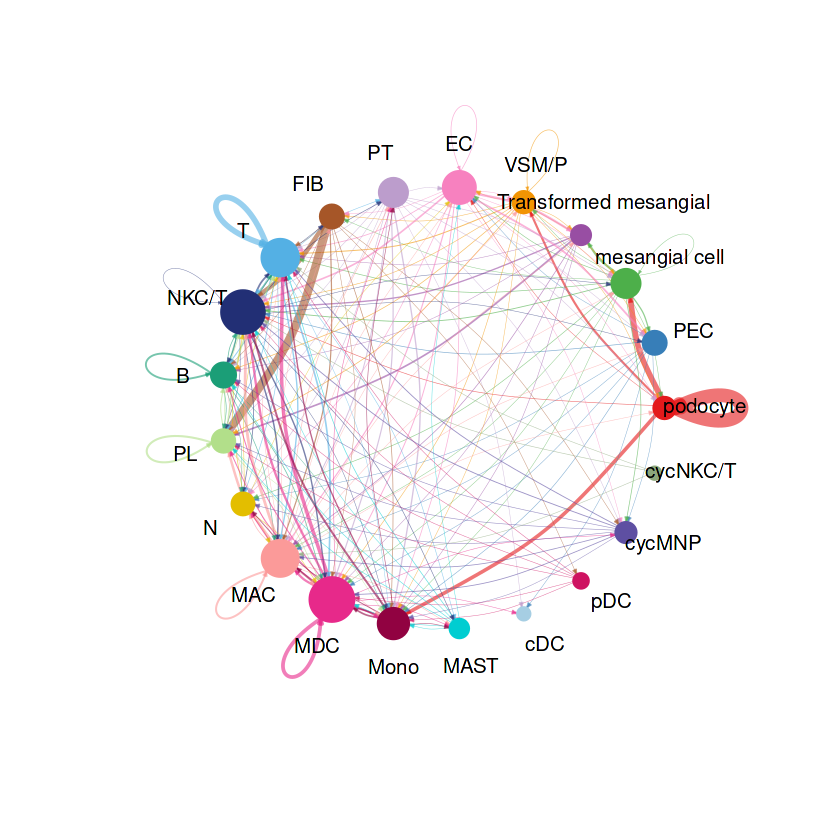

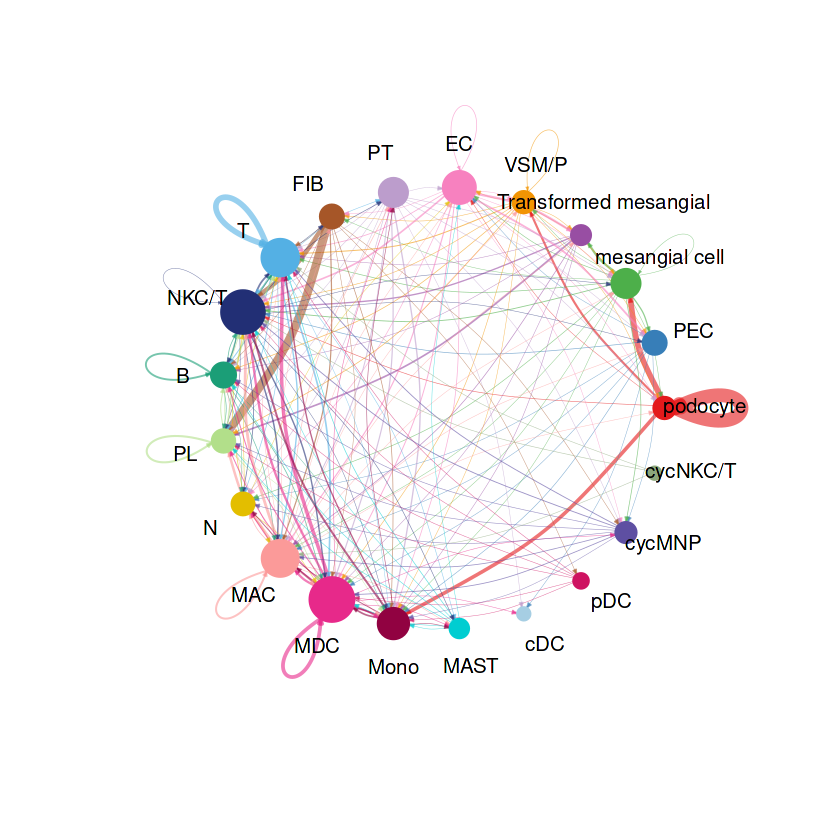

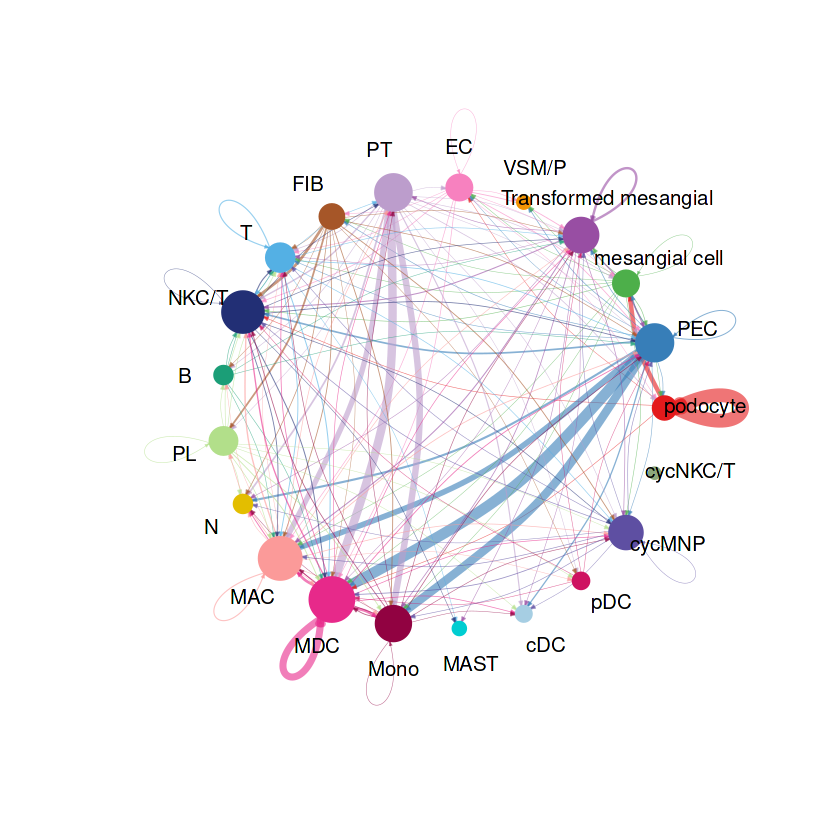

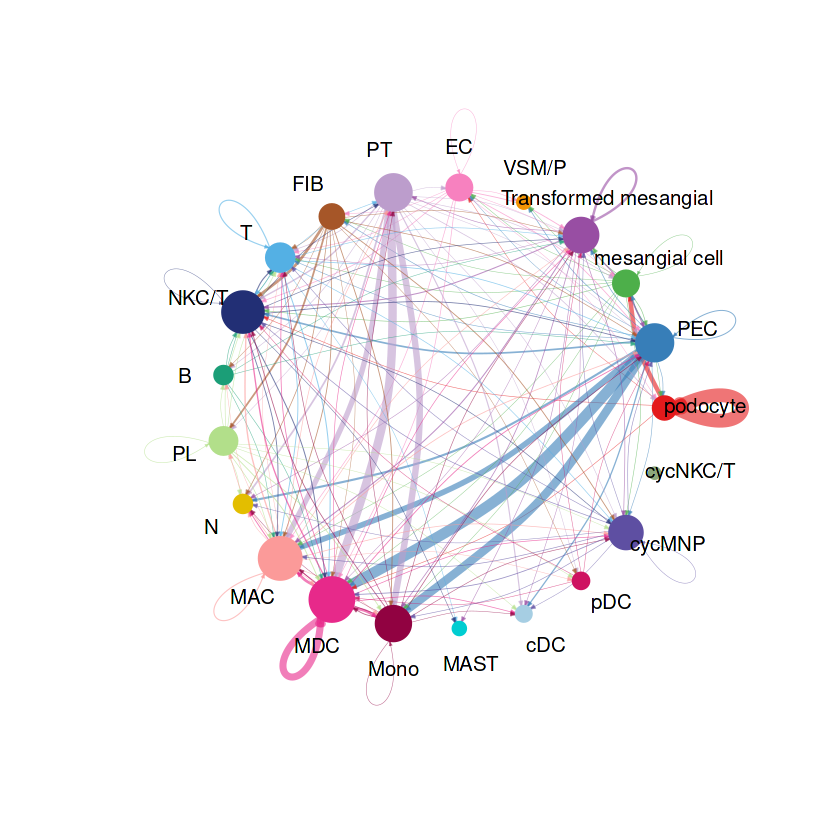

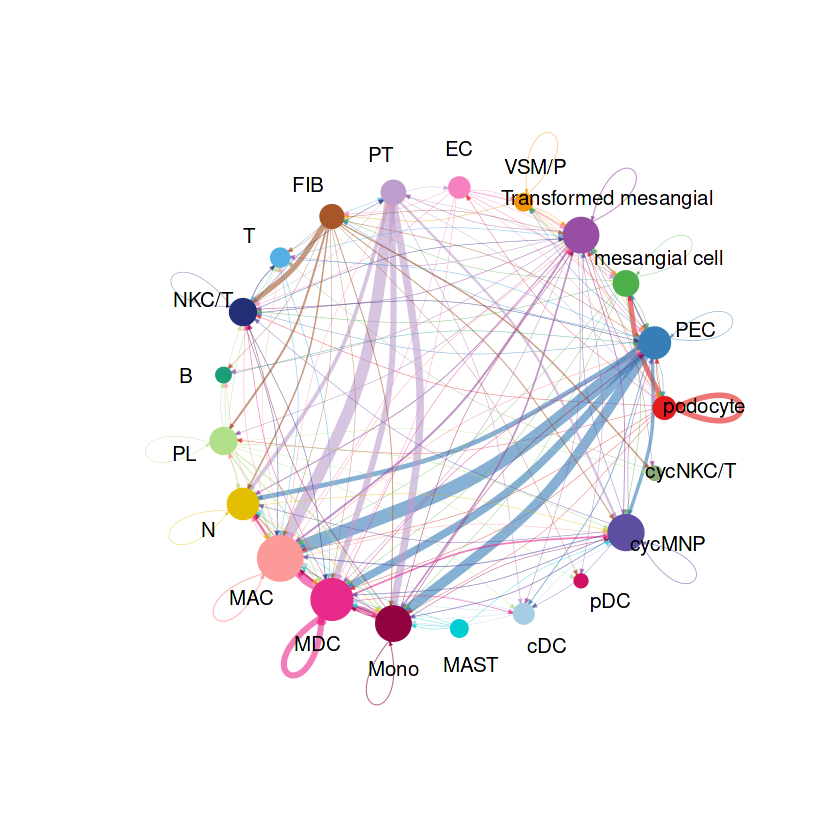

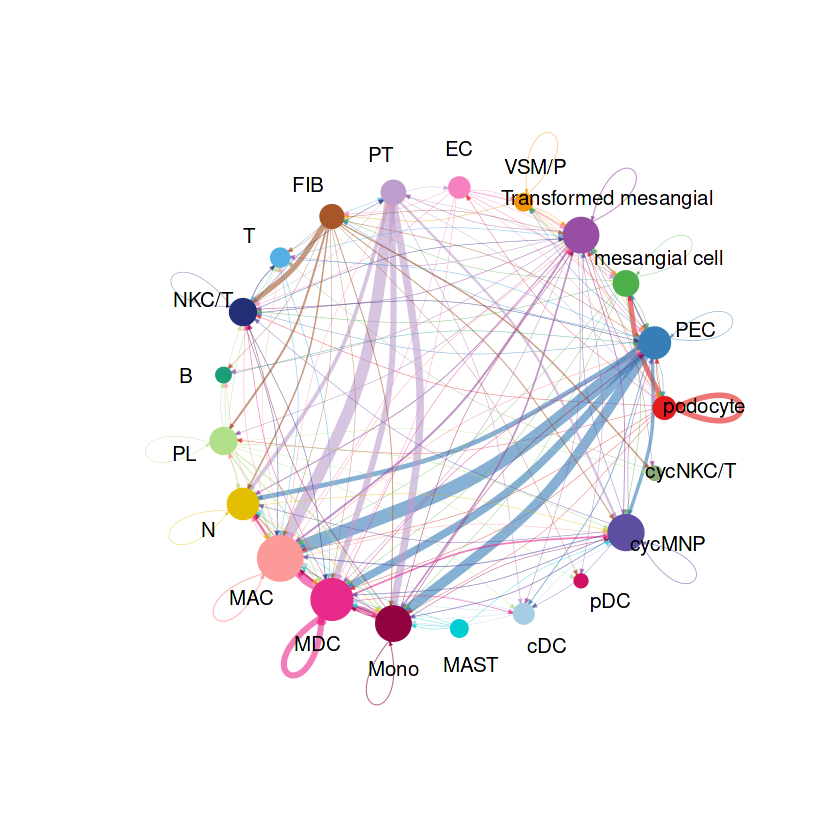

In [9]:
## interactions w.r.t control for the 3 diseases
CNTRL_cGN_weight_FC = cGN_weight/(CNTRL_weight+1E-20)
vertex.weight.cGN = rowSums(cGN@net$count)+colSums(cGN@net$count)
netVisual_circle(CNTRL_cGN_weight_FC, vertex.weight = vertex.weight.cGN , weight.scale = T, label.edge= F, title.name = "Interaction_weights: cGN_FCo_CNTRL")

CNTRL_SLE_weight_FC = SLE_weight/(CNTRL_weight+1E-20)
vertex.weight.SLE = rowSums(SLE@net$count)+colSums(SLE@net$count)
netVisual_circle(CNTRL_SLE_weight_FC, vertex.weight = vertex.weight.SLE , weight.scale = T, label.edge= F, title.name = "Interaction_weights: SLE_FCo_CNTRL")


CNTRL_ANCA_weight_FC  = ANCA_weight/(CNTRL_weight+1E-20)
vertex.weight.ANCA = rowSums(ANCA@net$count)+colSums(ANCA@net$count)
netVisual_circle(CNTRL_ANCA_weight_FC, vertex.weight = vertex.weight.ANCA , weight.scale = T, label.edge= F, title.name = "Interaction_weights: ANCA_FCo_CNTRL")


CNTRL_GBM_weight_FC  = GBM_weight/(CNTRL_weight+1E-20)
vertex.weight.GBM = rowSums(GBM@net$count)+colSums(GBM@net$count)
netVisual_circle(CNTRL_GBM_weight_FC, vertex.weight = vertex.weight.GBM , weight.scale = T, label.edge= F, title.name = "Interaction_weights: GBM_FCo_CNTRL")


In [10]:
grDevices::cairo_pdf('./output/Interactions_cGNoCNTRL.pdf', width = 8, height = 10)
print(netVisual_circle(CNTRL_cGN_weight_FC, vertex.weight = vertex.weight.cGN, weight.scale = T, label.edge= F, title.name = "cGN over control"))
dev.off()

png 
  2

In [11]:
grDevices::cairo_pdf('./output/Interactions_SLEoCNTRL.pdf', width = 8, height = 10)
print(netVisual_circle(CNTRL_SLE_weight_FC, vertex.weight = vertex.weight.SLE, weight.scale = T, label.edge= F, title.name = "SLE over control"))
dev.off()

png 
  2

In [12]:
grDevices::cairo_pdf('./output/Interactions_ANCAoCNTRL.pdf', width = 8, height = 10)
print(netVisual_circle(CNTRL_ANCA_weight_FC, vertex.weight = vertex.weight.ANCA, weight.scale = T, label.edge= F, title.name = "ANCA over control"))
dev.off()

png 
  2

In [13]:
grDevices::cairo_pdf('./output/Interactions_GBMoCNTRL.pdf', width = 8, height = 10)
print(netVisual_circle(CNTRL_GBM_weight_FC, vertex.weight = vertex.weight.GBM, weight.scale = T, label.edge= F, title.name = "GBM over control"))
dev.off()

png 
  2

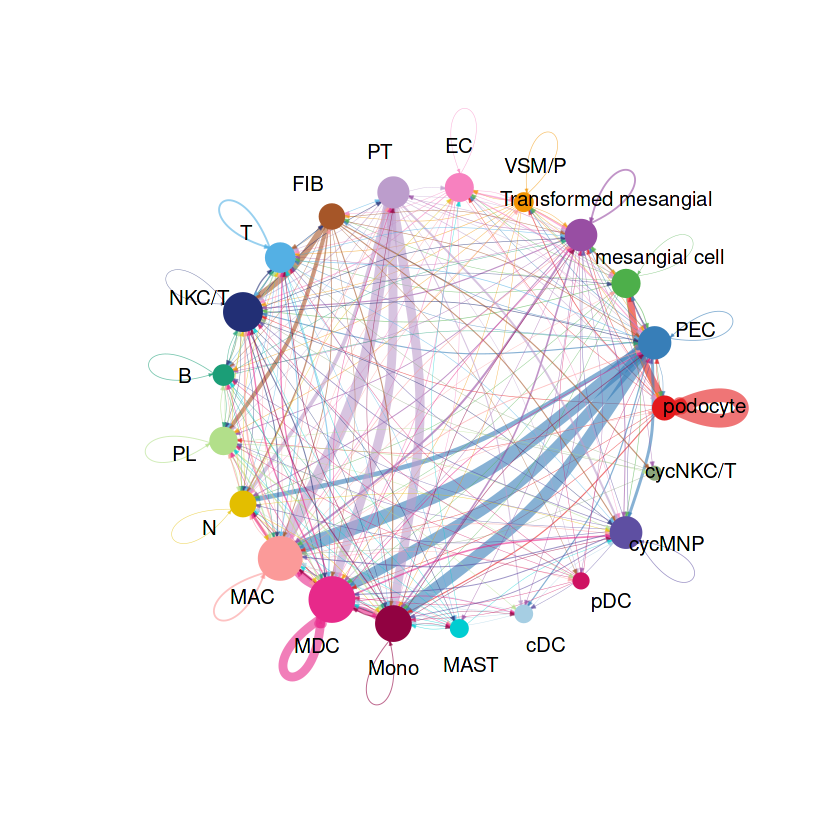

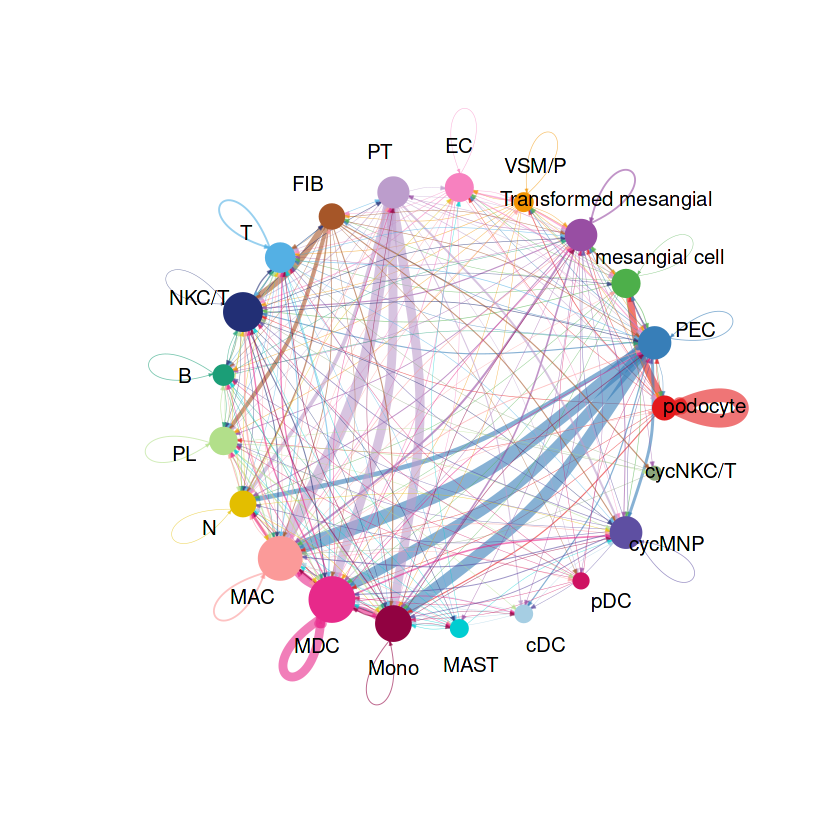

In [14]:
## interactions w.r.t control for cGN
cGN_weight_sum = SLE_weight + ANCA_weight + GBM_weight

CNTRL_cGNsum_weightFC = cGN_weight_sum/(CNTRL_weight+1E-20)
vertex.weight.cGN = rowSums(SLE@net$count)+colSums(SLE@net$count) + rowSums(ANCA@net$count)+colSums(ANCA@net$count)  + 
rowSums(GBM@net$count)+colSums(GBM@net$count)

netVisual_circle(CNTRL_cGNsum_weightFC, vertex.weight = vertex.weight.cGN , weight.scale = T, label.edge= F, title.name = "Interaction_weights: cGNsumoCNTRL")



In [15]:
grDevices::cairo_pdf('./output/Interactions_cGNoCNTRL_Added.pdf', width = 8, height = 10)
print(netVisual_circle(CNTRL_cGNsum_weightFC, vertex.weight = vertex.weight.cGN , weight.scale = T, label.edge= F, title.name = "Interaction_weights: cGNsumoCNTRL"))
dev.off()

png 
  2

In [16]:
## All Signaling to PECs


In [17]:
CNTRL_comm<- subsetCommunication(CNTRL)
CNTRL_comm$condition = 'CNTRL'

SLE_comm<- subsetCommunication(SLE)
SLE_comm$condition = 'SLE'

ANCA_comm<- subsetCommunication(ANCA)
ANCA_comm$condition = 'ANCA'

GBM_comm<- subsetCommunication(GBM)
GBM_comm$condition = 'GBM'

all_comm = rbind(CNTRL_comm,SLE_comm,ANCA_comm,GBM_comm)

In [18]:
To_PEC_Signals = all_comm %>% 
  filter(target == 'PEC')

In [19]:
df_selected <- To_PEC_Signals %>%
  select(source, target, ligand, receptor, prob, pathway_name, condition)


In [20]:
df_selected%>%head()

source         target ligand receptor prob         pathway_name condition
1 mesangial cell PEC    PDGFA  PDGFRB   5.784677e-06 PDGF         SLE      
2 VSM/P          PEC    PDGFA  PDGFRB   1.117960e-07 PDGF         SLE      
3 mesangial cell PEC    PDGFB  PDGFRB   3.233331e-06 PDGF         SLE      
4 EC             PEC    PDGFB  PDGFRB   1.575459e-05 PDGF         SLE      
5 MAC            PEC    PDGFB  PDGFRB   4.044855e-07 PDGF         SLE      
6 NKC/T          PEC    FASLG  FAS      1.103987e-07 FASLG        SLE

In [21]:
unique(df_selected$pathway_name)

[1] "PDGF"  "FASLG" "SLIT"  "TGFb"

In [22]:
unique(df_selected$source)

[1] mesangial cell        VSM/P                 EC                   
 [4] MAC                   NKC/T                 PT                   
 [7] PEC                   Transformed mesangial FIB                  
[10] T                     B                     MDC                  
[13] Mono                  pDC                   cycMNP               
[16] podocyte             
21 Levels: podocyte PEC mesangial cell Transformed mesangial VSM/P EC ... cycNKC/T

In [23]:
df_selected <- df_selected %>%
  mutate(source = factor(source,levels=rev(levels(df_selected$source))),
         target = factor(target),
         condition = factor(condition, levels = c("SLE", "ANCA", "GBM")),  
         pathway_name = factor(pathway_name, levels = c("PDGF", "TGFb", "FASLG", "SLIT"))) 

Saving 6.67 x 6.67 in image


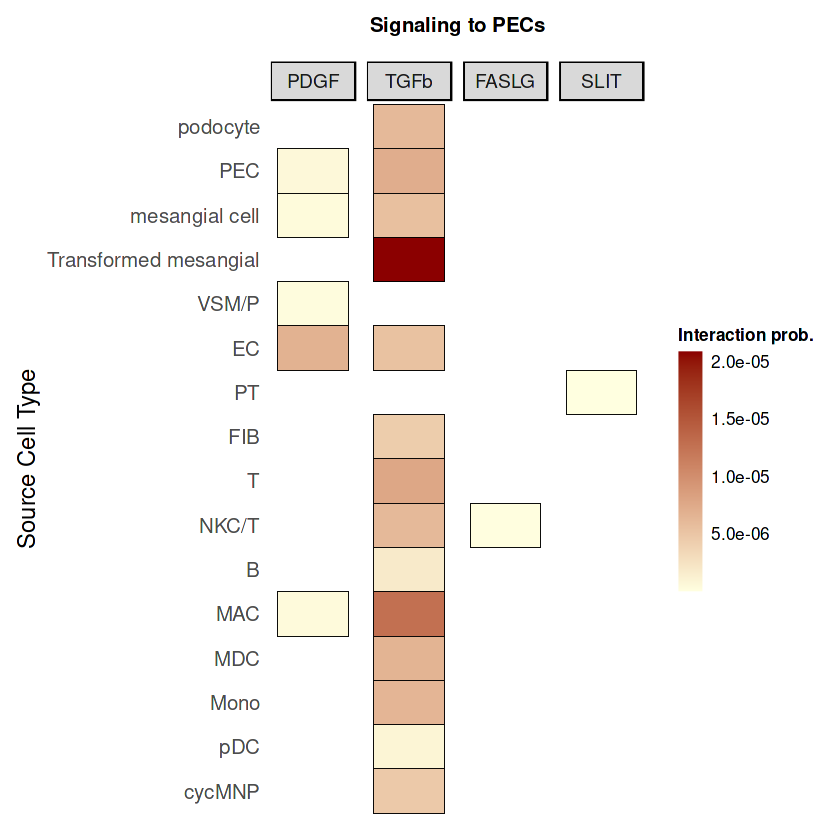

In [24]:
g = ggplot(df_selected, aes(x = target, y = source)) +
    geom_tile(aes(fill = prob), color = "black", size = 0.2) +
    scale_fill_gradient(low = "lightyellow", high = "darkred", name = "Interaction prob.", 
                        guide = guide_colorbar(title = "Interaction prob.", 
                                               title.position = "top",
                                               barwidth = 1,
                                               barheight = 10,
                                               label = T,
                                               ticks = FALSE, 
                                               label.position = "right")) +  
    labs(x = NULL, y = "Source Cell Type") +
    theme_minimal(base_size = 14) +
    theme(axis.text.x = element_blank(),
          axis.text.y = element_text(angle = 0, hjust = 1, vjust = 0.5, size = 12),
          axis.ticks.y = element_blank(),
          axis.title.x = element_text(face = "bold", size = 12, margin = margin(t = 10)),
          plot.title = element_text(face = "bold", hjust = 0.5, size = 12, margin = margin(b = 15)),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          legend.title = element_text(face = "bold", size = 10),
          legend.text = element_text(size = 10),
          strip.text.y = element_text(angle = 90, size = 9, face = "bold"),
          strip.background = element_rect(fill = "grey85"),
          plot.margin = margin(10, 10, 10, 10)) +
    facet_grid(. ~ pathway_name, scales = "free", space = "free") +
    ggtitle("Signaling to PECs")

g
ggsave('./output/Signaling_to_PECs_summary.pdf', plot = g)


Saving 6.67 x 6.67 in image


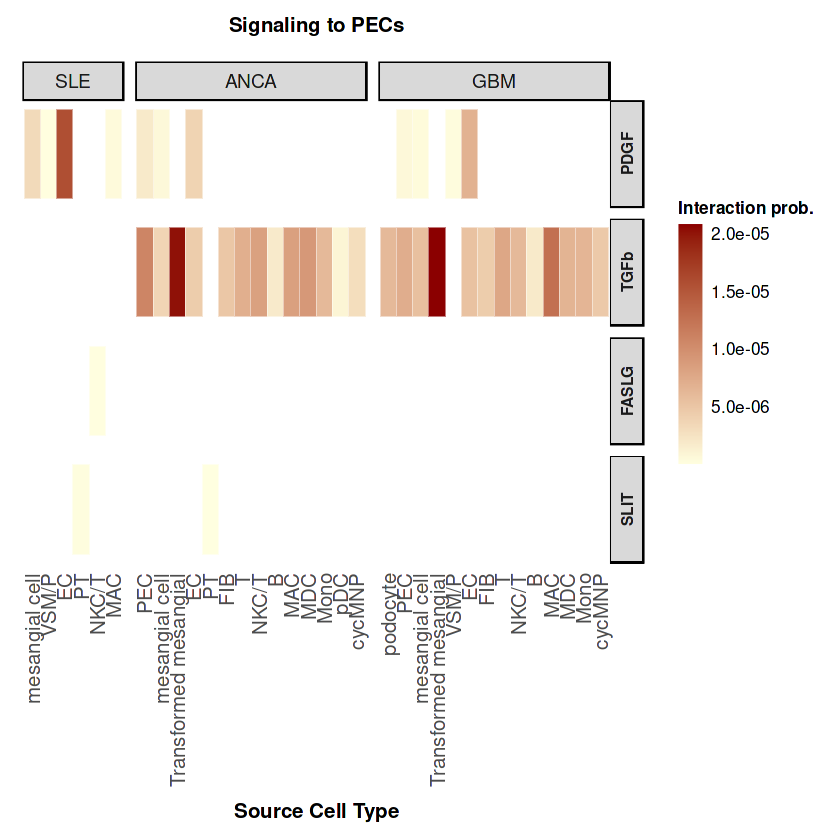

In [25]:
df_selected <- To_PEC_Signals %>%
  select(source, target, ligand, receptor, prob, pathway_name, condition)

df_selected2 <- df_selected %>%
  mutate(source = factor(source, levels = levels(df_selected$source)),
         target = factor(target),
         condition = factor(condition, levels = c("SLE", "ANCA", "GBM")),  
         pathway_name = factor(pathway_name, levels = c("PDGF", "TGFb", "FASLG", "SLIT")))

g = ggplot(df_selected2, aes(x = source, y = target)) +
    geom_tile(aes(fill = prob), color = "white") +
    scale_fill_gradient(low = "lightyellow", high = "darkred", name = "Interaction prob.", 
                        guide = guide_colorbar(title = "Interaction prob.", 
                                               title.position = "top",
                                               barwidth = 1,
                                               barheight = 10,
                                               label = T,
                                               ticks = FALSE, 
                                               label.position = "right")) +  
    labs(x = "Source Cell Type", y = NULL) +
    theme_minimal(base_size = 14) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 12),
          axis.text.y = element_blank(),
          axis.ticks.y = element_blank(),
          axis.title.x = element_text(face = "bold", size = 12, margin = margin(t = 10)),
          plot.title = element_text(face = "bold", hjust = 0.5, size = 12, margin = margin(b = 15)),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          legend.title = element_text(face = "bold", size = 10),
          legend.text = element_text(size = 10),
          strip.text.y = element_text(angle = 90, size = 9, face = "bold"),
          strip.background = element_rect(fill = "grey85"),
          plot.margin = margin(10, 10, 10, 10)) +
    facet_grid(pathway_name ~ condition, scales = "free", space = "free") +
    ggtitle("Signaling to PECs")

g
ggsave('./output/Signaling_to_PECs_Diseases.pdf', plot = g)
